# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.

Далее представлена простая иллюстрация явного метода Эйлера для решения такого уравнения.

In [149]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [150]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


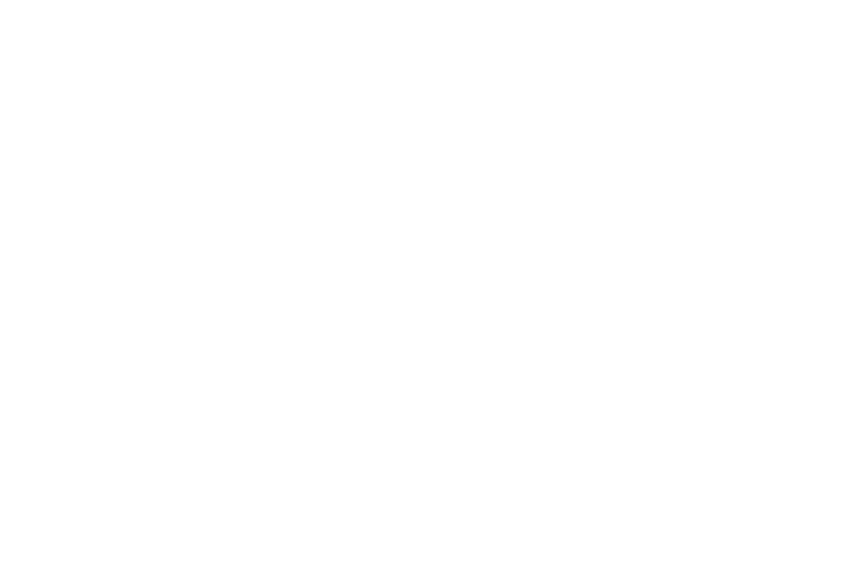

<IPython.core.display.Javascript object>


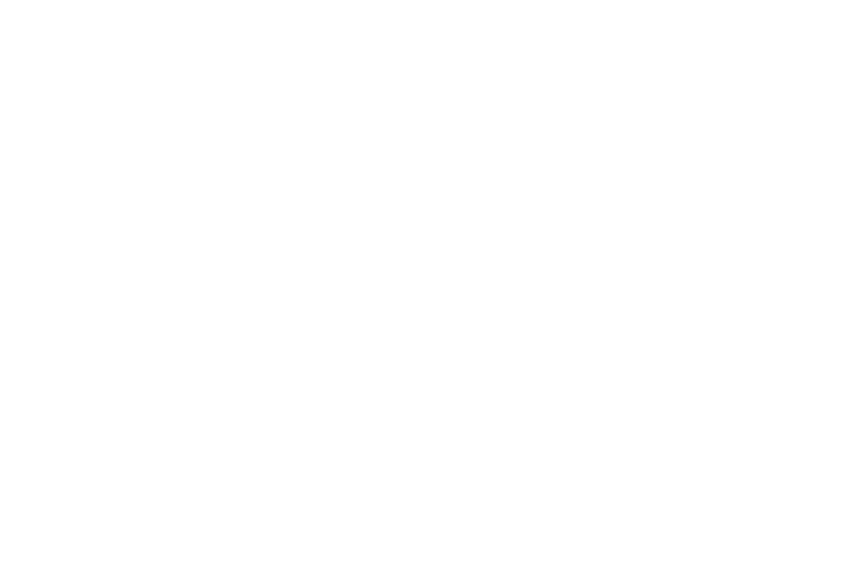

In [151]:
lam = -0.5
tt, y = euler_solve(lam, u0 = 1.0, T = 5, dt = 0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Тест I.1

Проверьте функцию выше, варьируя шаг $\tau$ (в коде это `dt`), $|\lambda| \tau > 1$.

(10% итоговой оценки)

<IPython.core.display.Javascript object>


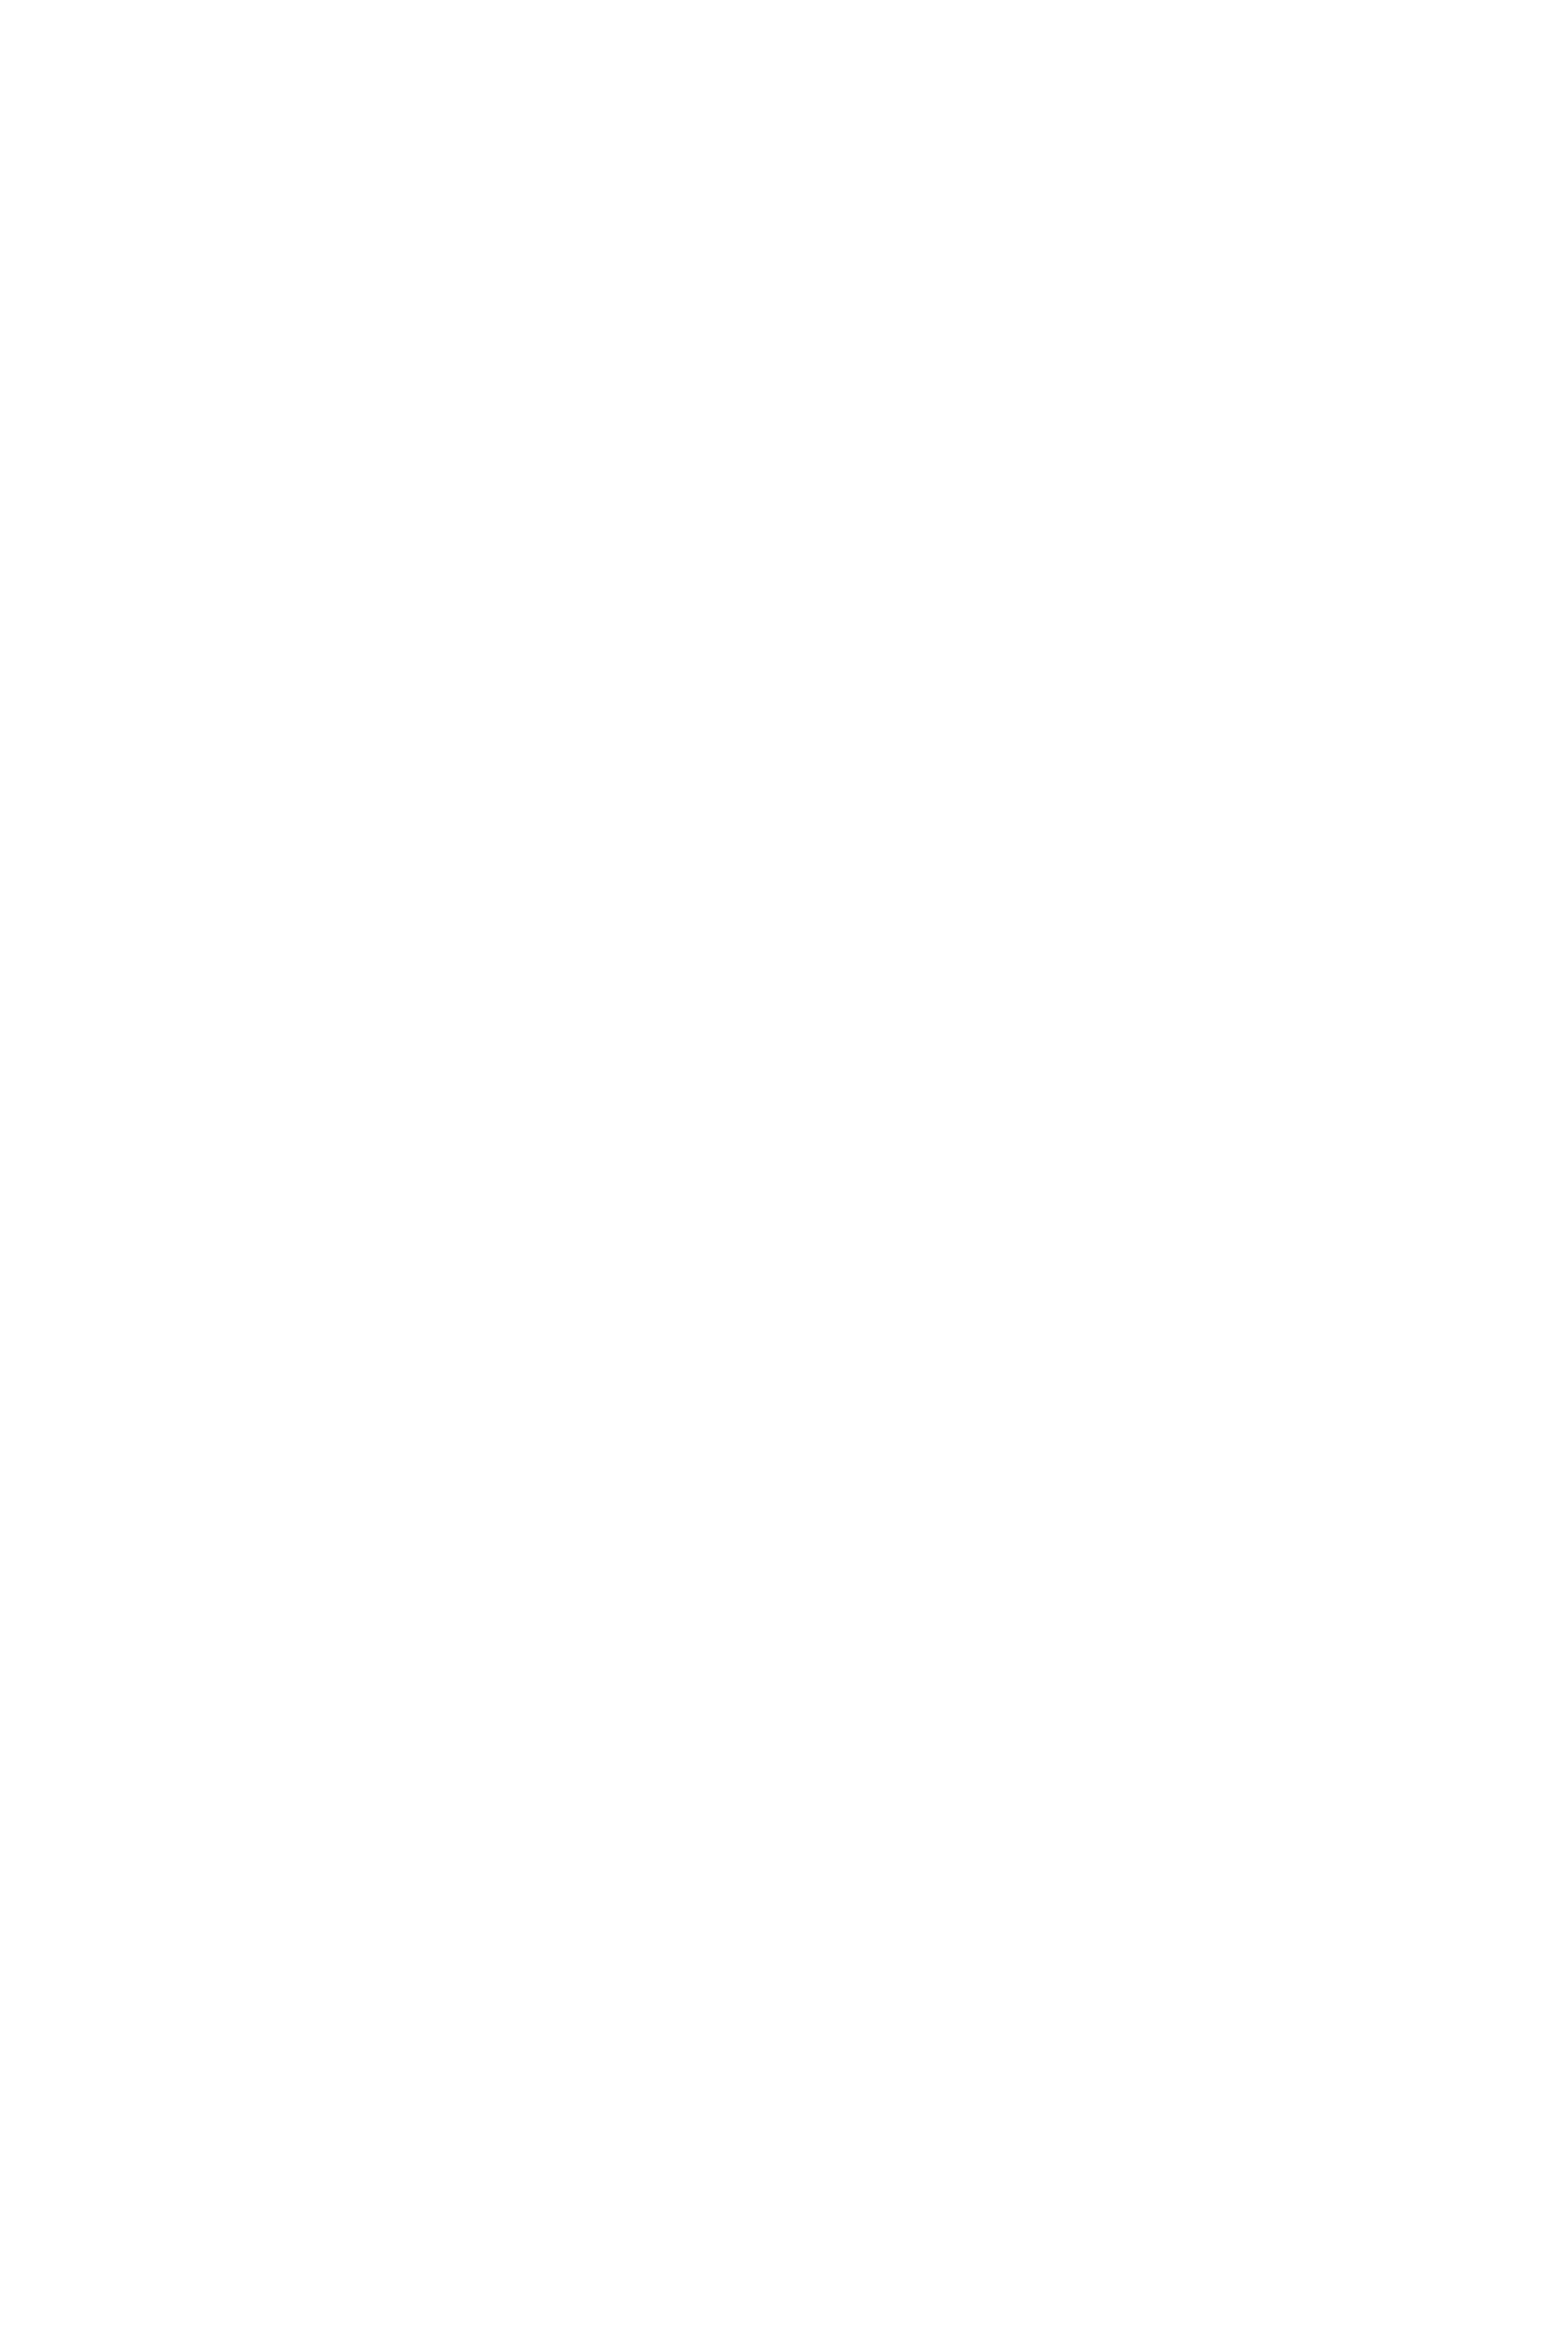

<IPython.core.display.Javascript object>


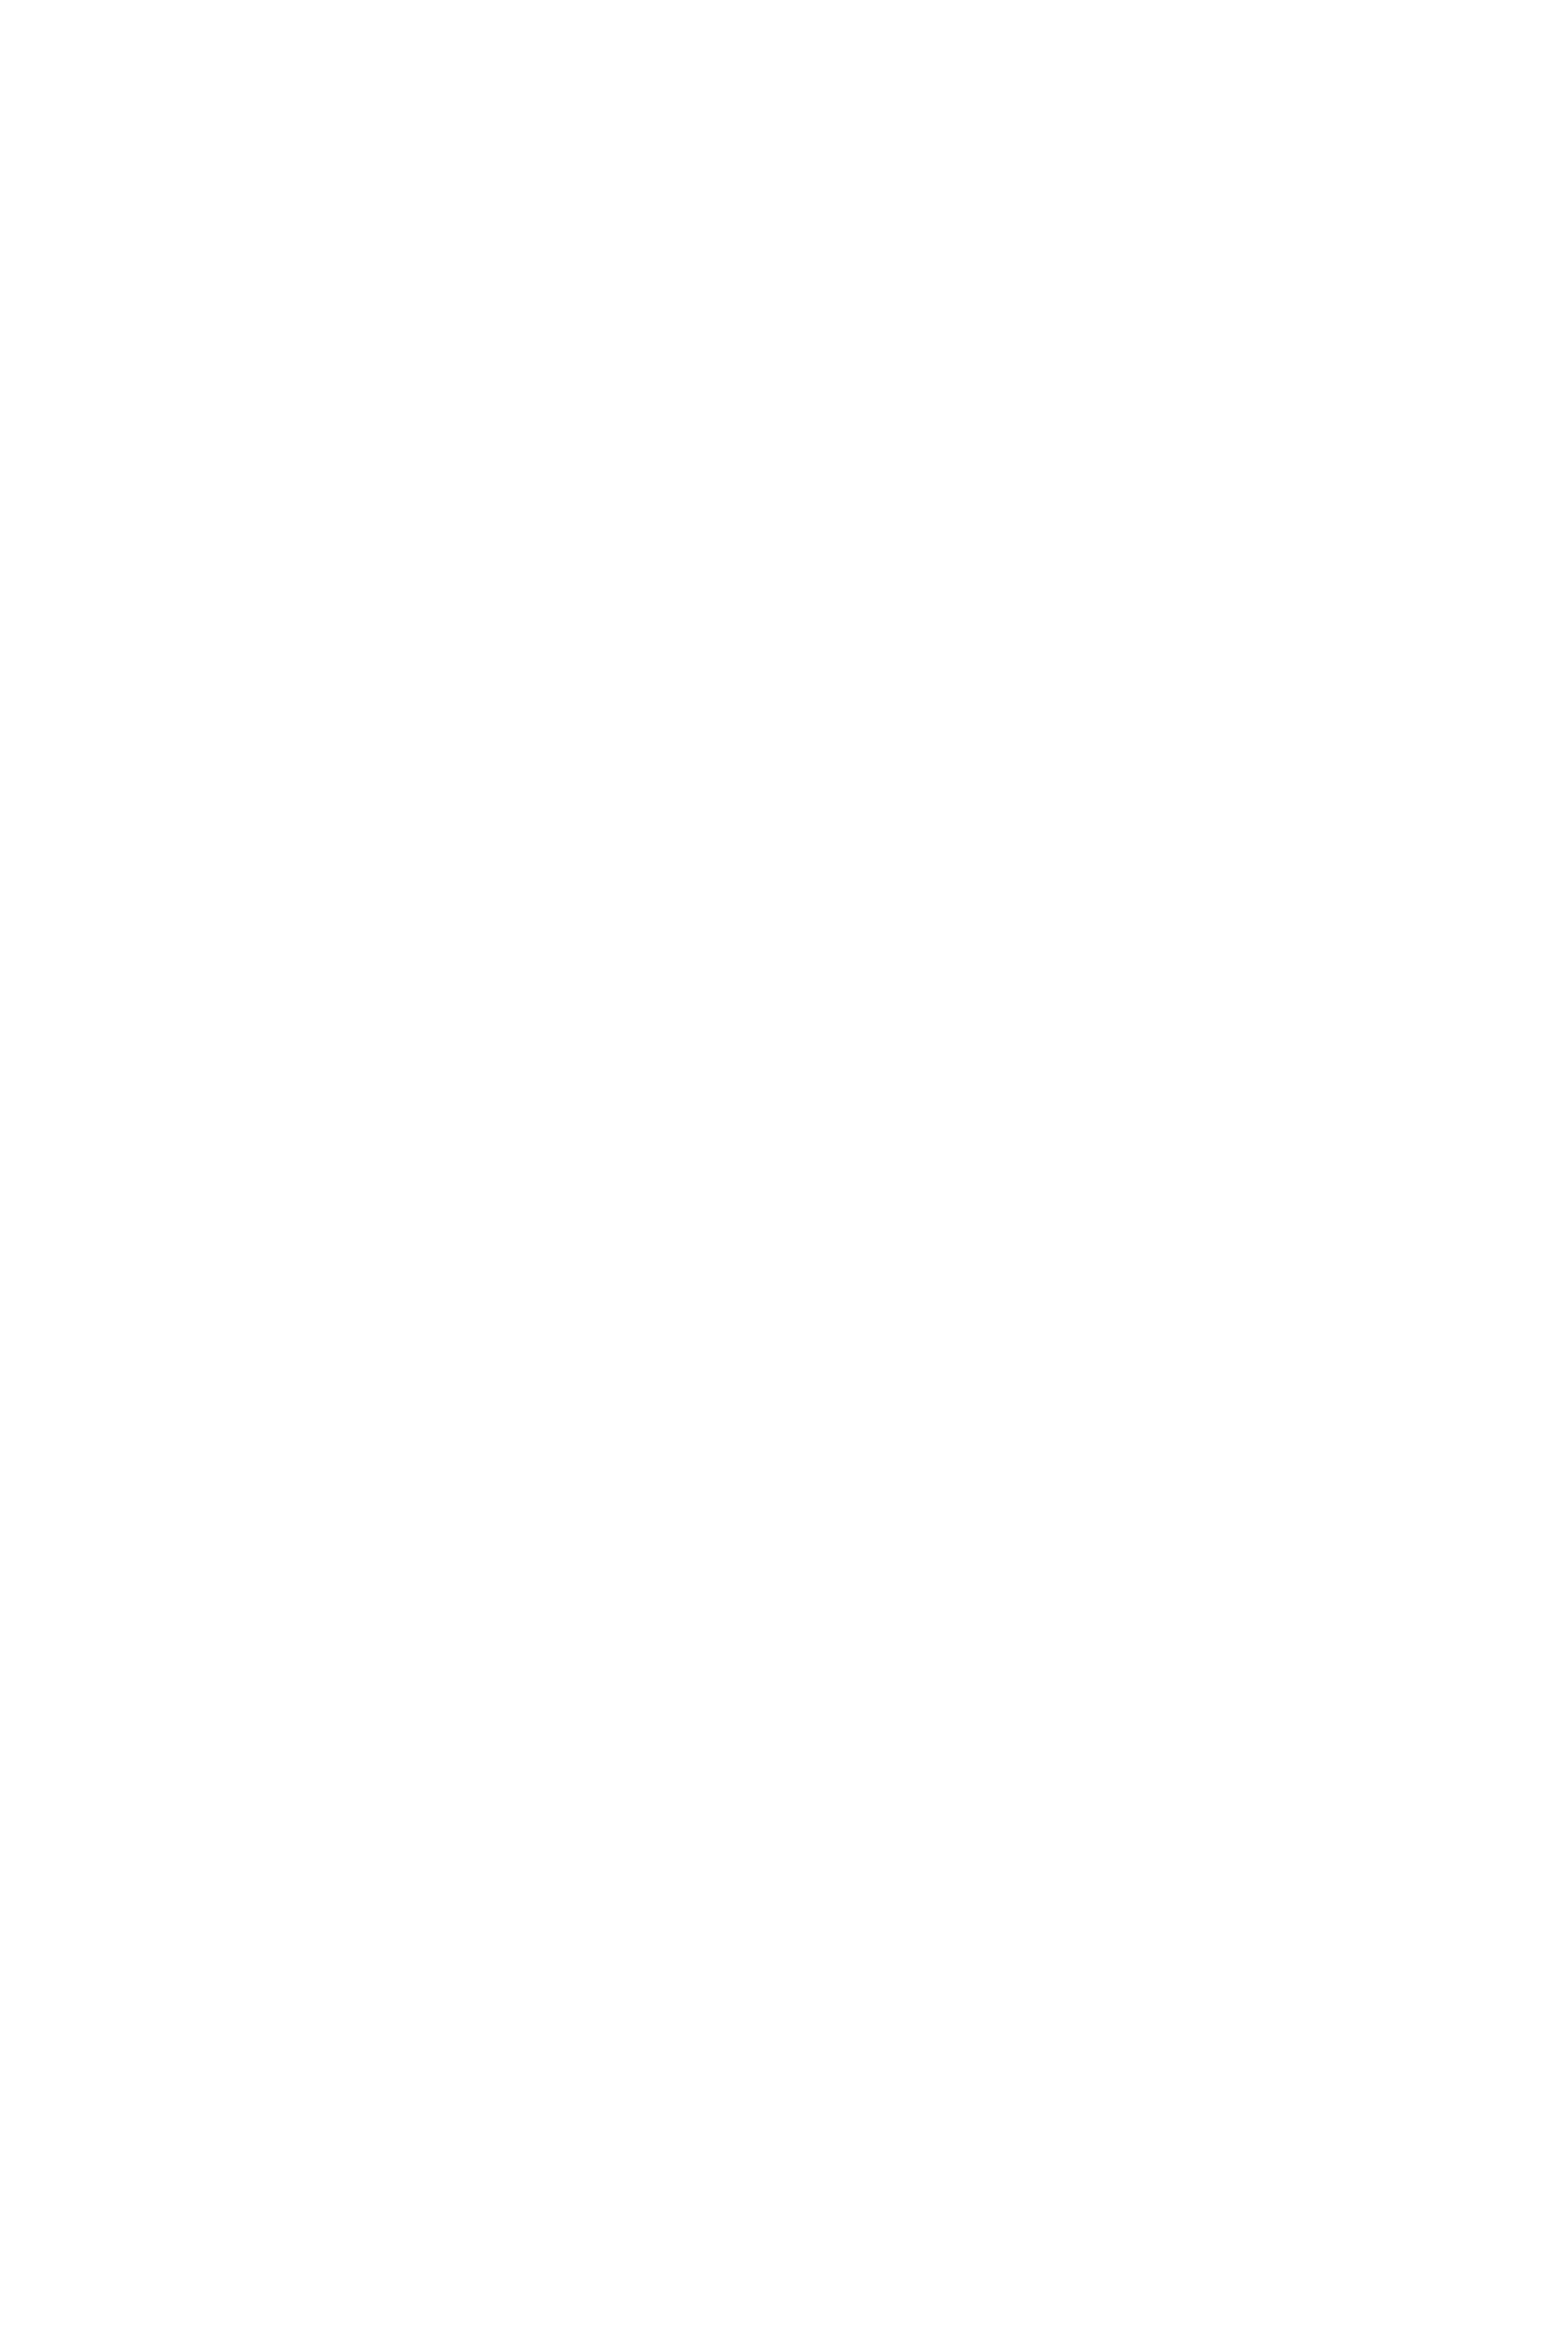

In [152]:

plt.figure(figsize = (12, 18))

for i in range(1,7):   
    
        tt, y = euler_solve(lam, u0 = 1.0, T = 5, dt = 00.1 * i)
        plt.subplot(3, 2, i)
        plt.plot(tt, y, '--', label = 'numeric solution')
        plt.plot(tt, np.exp(lam * tt), '-', label = 'ground truth')
        plt.legend(loc = 'best')

plt.show()


### Тест I.2

Решите то же самое уравнение $du/dt = \lambda u$, используя невную схему Эйлера. Сравните поведение неявной и явной схем Эйлера. Обсудите.

(10% итогвой оценки)

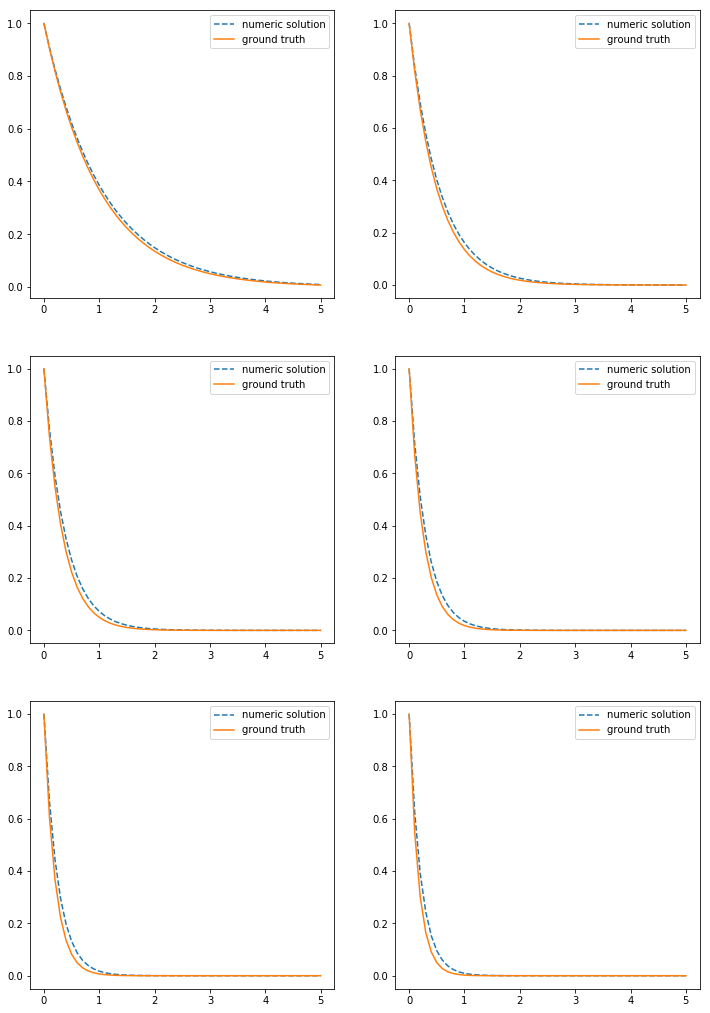


 Trying to fit perfectly 



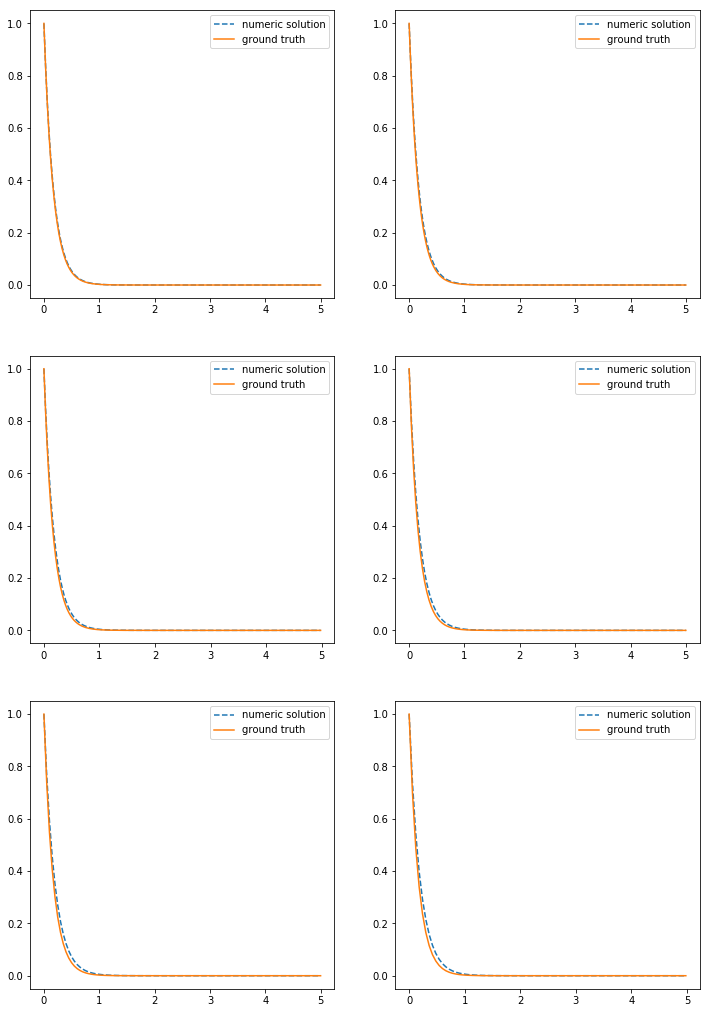

In [153]:
%matplotlib inline
def euler_not(lam, u0, T, dt):
   
    num_steps = T / dt
    num_steps = int(num_steps)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty(num_steps + 1)
    y[0] = u0
    
    for k in range(num_steps):
        y[k + 1] = y[k] / (1 - dt * lam)
        
    return tt, y

# increasing abs(lambda) and lambda*tau --> 1

plt.figure(figsize = (12, 18))

for i in range(1, 7):   
    
        lam = - i
        tt, y = euler_not(lam, u0 = 1.0, T = 5, dt = 0.1)
        
        plt.subplot(3, 2, i)
        plt.plot(tt, y, '--', label = 'numeric solution')
        plt.plot(tt, np.exp(lam * tt), '-', label = 'ground truth')
        plt.legend(loc = 'best')
        
        
plt.show()

#it's getting closer, but let's try this

print( '\n', 'Trying to fit perfectly', '\n')
plt.figure(figsize = (12, 18))

for i in range(1, 7):   
    
        tt, y = euler_not(lam, u0 = 1.0, T = 5, dt = 0.01 * i)
        
        plt.subplot(3, 2, i)
        plt.plot(tt, y, '--', label = 'numeric solution')
        plt.plot(tt, np.exp(lam * tt), '-', label = 'ground truth')
        plt.legend(loc = 'best')
        
plt.show()

## II. Жесткие системы.

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = const$ - известная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [154]:
def euler_new(A, u0, T, dt):
    
    num_steps = int (T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([2, num_steps + 1])
    y[:, 0] = u0
    
    for k in range(num_steps):
        y[ :, k + 1 ] = y[:, k] + dt * A @ y[:, k]
        
    return tt, y

### Тест II.1

Возьмите 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $\mathbf{u} = (1, 0)^T$.

Решите систему, используя фиксированный шаг $\tau=0.01$. Стабилен ли метод на шаге такого размера?

Найдите собственные значения $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(20% итоговой оценки)

In [155]:
A = np.array([[-10, 10], [32, -499]])
u0 = np.array([1, 0])

yet = euler_new (A, u0, 1, 0.01)[1]
print(np.linalg.eigvals(A))
print( 'max = ', np.max(yet) )

# похоже, разошлось, судя по несогласованности

[  -9.34647667 -499.65352333]
max =  2.4063722001094805e+58


### Тест II.2

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Выполните те же самые шаги, что и в тесте II.1 с таким же шагом $\tau=0.01$. Сравните решения, полученные явной и неявной схемами Эйлера.

(20% итоговой оценки)

In [156]:
def euler_perf(A, u0, T, dt):

    num_steps = int(T / dt)
    tt = np.arange(num_steps + 1) * dt
    y = np.empty((2, num_steps + 1))
    y[:, 0] = u0

    for k in range(num_steps):
        y[:, k+1] = np.linalg.solve((np.eye(2) - A * dt), y[:, k])
        
    return tt, y

yetn = euler_perf (A, u0, 1, 0.01)[1]
print(np.linalg.eigvals(A))
print( 'max = ', np.max(yetn) )

#сошлось!

[  -9.34647667 -499.65352333]
max =  1.0


# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера так, чтобы ответ захватывал хотя бы несколько периодов осциллятора. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

(20% итоговой оценки)

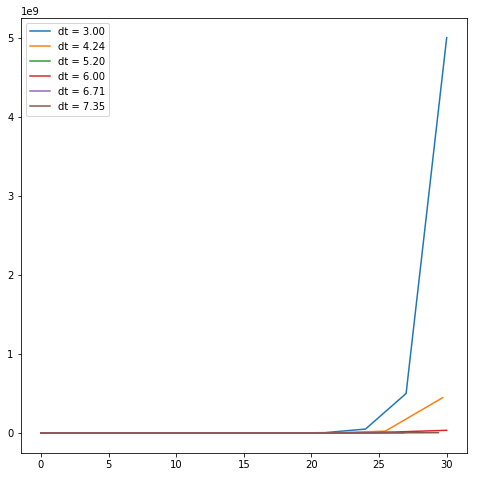

In [157]:
def E(u, w):
    
    out = u[1, :] ** 2 / 2 
    out += ( w * u[0,:] ) ** 2 / 2
    return out

w = 1
B = np.array ( [[ 0, - w**2 ], [1, 0]] )
u0 = np.array([0., 1.])

    
plt.figure(figsize = (8,8))    


for i in range(1, 7):
    dt = 3 * i ** 0.5 
    te, ye = euler_new(B, u0, 30., dt)
    plt.plot(te, E(ye, w), label = "dt = {:.2f}".format(dt))
    
plt.legend(loc = 'best')

#Энергия не сохраняется, энергия растет! Но с уваеличением шага все медленнее 

#### Тест III.2

Реализуйте схему Рунге - Кутта второго порядка. Используте ее для решения того же уравнения с теми же шагами. Сравните решения, полученные методом Рунге - Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(20% итоговой оценки)

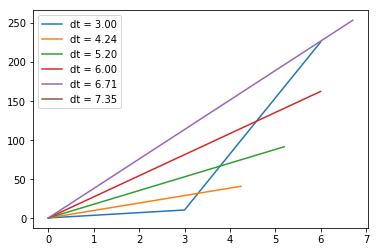

In [158]:
def run_cut(A, u0, T, dt):
    
    num_steps = int( T / dt )
    tt = np.arange(num_steps + 1) * dt
    y = np.empty([2, num_steps + 1])
    y[:,0] = u0
    
    for k in range(num_steps):
        fir = dt * A @ y[:,k] / 2
        add = y[:, k] + fir
        y[:,k+1] = y[:, k] + dt * A @ add
        
    return tt, y

for i in range(1, 7):
    dt = 3 * i ** 0.5
    te, ye = run_cut(B, u0, 7., dt)
    plt.plot(te, E(ye, w), label = "dt = {:.2f}".format(dt))
    
plt.legend(loc = 'best')

# Этот метод ближе к истинным значениям энергии